Challenge Set 5  
Topic:        Classification  
Date:         07/27/2016  
Name:         Avi Grunwald  
Worked with:  

**Challenge 1**

In [3]:
import pandas as pd
import numpy as np

In [72]:
house = pd.read_csv('/home/avi/Documents/metis/Projects/Challenges/house-votes-84.data', header=None)

In [73]:
house.replace(['y', 'n', '?'], [1, 0, np.nan], inplace=True)

In [74]:
house.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [81]:
means = [ house[x].mean() for x in house if x!=0 ]
means_vote = [ round(house[x].mean()) for x in house if x!=0 ]

In [77]:
for x in range(1, len(house.columns)):
        house[x] = house[x].replace(np.nan, means_vote[x-1])

In [78]:
house.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
2,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0


**Challenge 2**

In [99]:
parties = house[0].replace(['republican', 'democrat'], [0, 1])

In [180]:
from sklearn.cross_validation import train_test_split

X = house.iloc[:,1:]
y = parties

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=4444)

**Challenge 3**

In [97]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [161]:
k_accs = []
k_just_accs = []

for i in range(1,21):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(x_train, y_train)
    k_just_accs.append(accuracy_score(y_test, neigh.predict(x_test)))
    k_accs.append( [i, accuracy_score(y_test, neigh.predict(x_test))] )

In [160]:
max(k_accs, key=lambda x: x[1])

[4, 0.92366412213740456]

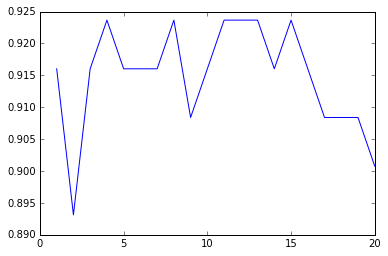

In [118]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(1,21), accs)
plt.show()

**Challenge 4**

In [88]:
from sklearn.linear_model import LogisticRegression

In [158]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
log_acc = accuracy_score(y_test, logreg.predict(x_test))
print (log_acc)

0.93893129771


**Challenge 5**

In [125]:
import seaborn as sns

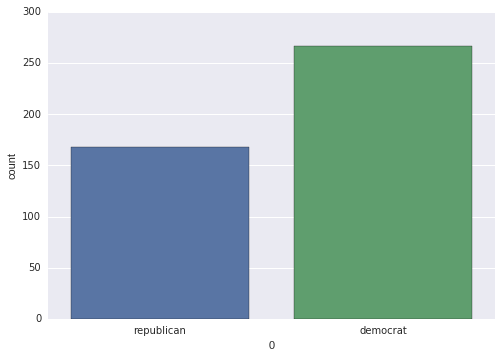

In [138]:
sns.countplot(x=0, data=house);

In [157]:
dem_acc = accuracy_score(y_test, [ 1 for x in y_test ])
rep_acc = accuracy_score(y_test, [ 0 for x in y_test ])
print ('Democrat Accuracy: {}'.format(dem_acc))
print ('Republican Accuracy: {}'.format(rep_acc))

Democrat Accuracy: 0.5877862595419847
Republican Accuracy: 0.4122137404580153


**Challange 6**

In [162]:
all_acc = pd.DataFrame({ 'k': range(1,21), 'knn': k_just_accs, 'log': log_acc, 'dem': dem_acc, 'rep': rep_acc })

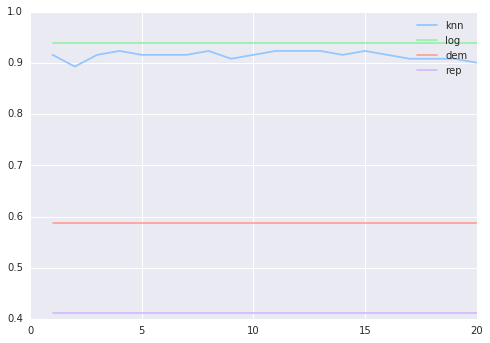

In [185]:
plt.plot(all_acc.k, all_acc.knn, label='knn')
plt.plot(all_acc.k, all_acc.log, label='log')
plt.plot(all_acc.k, all_acc.dem, label='dem')
plt.plot(all_acc.k, all_acc.rep, label='rep')
plt.legend()
plt.show()

**Challenge 7**

In [190]:
from sklearn.learning_curve import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    logreg, X, y, cv=5, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5))

In [191]:
train_cv_scores = np.mean(train_scores, axis=1)
test_cv_scores = np.mean(test_scores, axis=1)

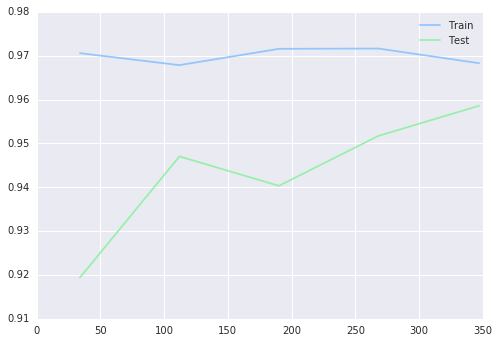

In [192]:
plt.plot(train_sizes, train_cv_scores, label='Train')
plt.plot(train_sizes, test_cv_scores, label='Test')
plt.legend()
plt.show()

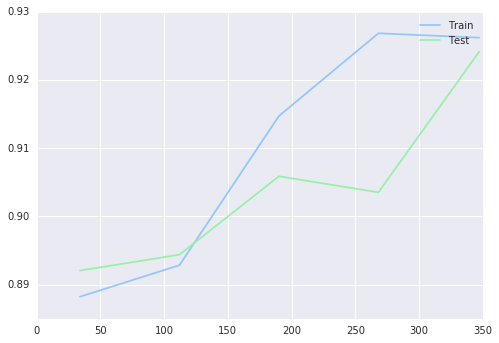

In [201]:
train_sizes, train_scores, test_scores = learning_curve(
    neigh, X, y, cv=5, n_jobs=1)

train_cv_scores = np.mean(train_scores, axis=1)
test_cv_scores = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_cv_scores, label='Train')
plt.plot(train_sizes, test_cv_scores, label='Test')
plt.legend()
plt.show()

**Challenge 8**

In [202]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
accuracy_score(y_test, nb.predict(x_test))

0.93893129770992367

In [209]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
accuracy_score(y_test, svc.predict(x_test))

0.95419847328244278

In [210]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
accuracy_score(y_test, dtc.predict(x_test))

0.92366412213740456

In [211]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
accuracy_score(y_test, rfc.predict(x_test))

0.96183206106870234

**Challenge 9**

In [215]:
from sklearn.cross_validation import cross_val_score

print ('NP: {}'.format(np.mean(cross_val_score(nb, X, y))) )
print ('SVC: {}'.format(np.mean(cross_val_score(svc, X, y))) )
print ('DTC: {}'.format(np.mean(cross_val_score(dtc, X, y))) )
print ('RFC: {}'.format(np.mean(cross_val_score(rfc, X, y))) )

NP: 0.9264367816091954
SVC: 0.9563218390804598
DTC: 0.9287356321839081
RFC: 0.9494252873563219


**Challenge 10**

In [37]:
rep = pd.read_csv('/home/avi/Documents/metis/Projects/Challenges/house-votes-84.data', header=None)
rep.replace(['y', 'n', '?'], [1, 0, np.nan], inplace=True)

In [29]:
# rep = rep.fillna(rep.mode().iloc[0])
for i in rep:
    rep.iloc[:,i] = rep.iloc[:,i].fillna(rep.iloc[:,i].mode())

In [47]:
vote_modes = [ rep.iloc[:,x].mode() for x in rep]

In [39]:
rep.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
2,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0


In [48]:
rep1 = rep.iloc[:,1:]

In [82]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score

In [65]:
X = rep1.iloc[:,1:]
y = rep1[1]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=4444)

In [66]:
vote_accs = []
vote_just_accs = []

for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    vote_just_accs.append(accuracy_score(y_test, knn.predict(x_test)))
    vote_accs.append( [i, accuracy_score(y_test, knn.predict(x_test))] )

In [68]:
max(vote_accs, key=lambda x: x[1])

[5, 0.70229007633587781]

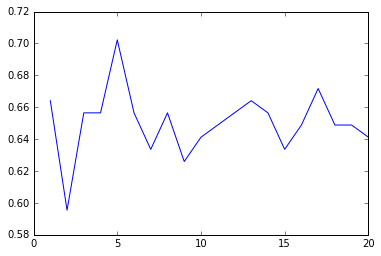

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(1,21), vote_just_accs)
plt.show()

In [73]:
print ('KNN: {}'.format(np.mean(cross_val_score(knn, X, y))) )

KNN: 0.6480589233541525


**Challenge 11**

In [78]:
from datetime import datetime

data_start = pd.read_csv('movies_list_all_df.csv', index_col=0)
movie_data = pd.read_csv('2013_movies.csv')
                        
data_start['rdm'] = data_start['Release Date'].apply(lambda x: datetime.strptime(x, '%B %d, %Y').strftime('%B'))
data_start['rdy'] = data_start['Release Date'].apply(lambda x: datetime.strptime(x, '%B %d, %Y').strftime('%Y'))
data_start['Release Date'] = data_start['Release Date'].apply(lambda x: datetime.strptime(x, '%B %d, %Y'))
# data_start['rd'] = pd.to_datetime(data_start.rd)

data_start['Domestic Total Gross'] = data_start['Domestic Total Gross'].apply(lambda x: int(''.join([i for i in x if i.isnumeric()])))
data_start['Opening Weekend Gross'] = data_start['Opening Weekend Gross'].apply(lambda x: int(''.join([i for i in x if i.isnumeric()])))

data_start['Runtime'].fillna(value='0 hrs. 0 min.', inplace=True)
data_start['Runtime'] = data_start['Runtime'].str.replace(' min.', '').str.split(' hrs. ').apply(lambda x: int(x[0]) * 60 + int(x[1]))
data_start = data_start[data_start['Runtime']!=0]
                         
data_start.columns = [ 'title', 'dtg', 'dist', 'rd', 'run', 'rating', 'pb', 'owg', 'owt', 'act', 'series', 'rdm', 'rdy']
data_start.head()

,title,dtg,dist,rd,run,rating,pb,owg,owt,act,series,rdm,rdy
0,Star Wars: The Force Awakens,936662225,Buena Vista,2015-12-18,136,PG-13,$245 million,247966675,"4,134",15,Yes,December,2015
1,Marvel's The Avengers,623357910,Buena Vista,2012-05-04,142,PG-13,$220 million,207438708,"4,349",13,Yes,May,2012
2,Jurassic World,652270625,Universal,2015-06-12,124,PG-13,$150 million,208806270,"4,274",7,Yes,June,2015
3,Avengers: Age of Ultron,459005868,Buena Vista,2015-05-01,141,PG-13,$250 million,191271109,"4,276",19,Yes,May,2015
4,The Dark Knight,533345358,Warner Bros.,2008-07-18,150,PG-13,$185 million,158411483,"4,366",11,Yes,July,2008


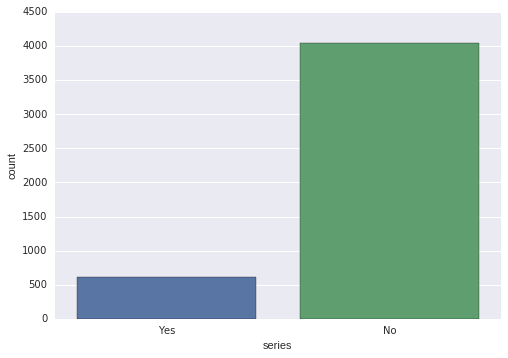

In [80]:
import seaborn as sns

sns.countplot(x='series', data=data_start);

In [81]:
from patsy import dmatrices

y.yes, X = dmatrices('series ~ dtg + run + rating + owg + act + rdm + rdy', data=data_start, return_type='dataframe')

In [107]:
x_train, x_test, y_train, y_test = train_test_split(X, y['series[Yes]'], test_size=.30, random_state=4444)

In [84]:
series_accs = []
series_just_accs = []

for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    series_just_accs.append(accuracy_score(y_test, knn.predict(x_test)))
    series_accs.append( [i, accuracy_score(y_test, knn.predict(x_test))] )

In [85]:
max(series_accs, key=lambda x: x[1])

[15, 0.88777698355968548]

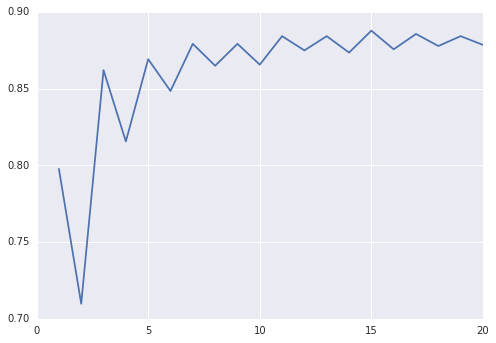

In [86]:
plt.plot(range(1,21), series_just_accs)
plt.show()

In [87]:
print ('KNN: {}'.format(np.mean(cross_val_score(knn, X, y))) )

KNN: 0.8676533676533676


In [108]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
accuracy_score(y_test, logreg.predict(x_test))

0.83059328091493922

In [111]:
y_test.mode()[0]

0.0

In [109]:
# Baseline if just predicted always not a series
accuracy_score(y_test, [0 for x in y_test ])

0.87062187276626157

Baseline actually does better than KNN or Logistic Regression.

In [112]:
logreg.coef_

array([[ -7.20986457e-14,  -3.61285923e-17,  -1.24826201e-14,
         -2.37618386e-14,  -3.30346035e-14,  -3.78320142e-17,
         -8.33637000e-15,  -7.22983573e-15,  -6.06037222e-15,
         -4.90085918e-15,  -3.63491342e-15,  -2.83614096e-15,
         -7.87196279e-15,  -2.81811898e-15,  -5.83937724e-15,
         -7.70887969e-15,  -6.79193821e-15,   0.00000000e+00,
          8.42825455e-17,   1.37907652e-17,   6.79836006e-17,
         -3.23302523e-16,  -3.61548654e-16,  -1.09300617e-15,
         -1.24546917e-15,  -1.65875629e-15,  -1.96720484e-15,
         -1.83496346e-15,  -1.97805868e-15,  -1.81406430e-15,
         -1.95317365e-15,  -1.87139439e-15,  -1.95892790e-15,
         -1.99944990e-15,  -2.43411775e-15,  -2.27300127e-15,
         -2.91892582e-15,  -2.95643281e-15,  -2.17277678e-15,
         -2.17694204e-15,  -2.33669155e-15,  -2.20816416e-15,
         -1.92462351e-15,  -2.09045379e-15,  -1.88187428e-15,
         -2.21297277e-15,  -2.84204804e-15,  -2.71090235e-15,
        

**Challenge 12**

In [115]:
surgery = pd.read_csv('/home/avi/Documents/metis/Projects/Challenges/haberman.data', header=None)
surgery.columns = ['age', 'yr_op', 'pos_nodes', 'status']

In [116]:
surgery.describe()

,age,yr_op,pos_nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [117]:
surgery.age.std()

10.80345234930328

In [118]:
surgery.age.mean()

52.45751633986928

In [126]:
print ('Greater than 5 yrs:')
print ('Std: {}'.format(surgery[surgery['status']==1].age.std()))
print ('Mean: {}'.format(surgery[surgery['status']==1].age.mean()))

Greater than 5 yrs:
Std: 11.012154179929546
Mean: 52.01777777777778


In [127]:
print ('Less than 5 yrs:')
print ('Std: {}'.format(surgery[surgery['status']==2].age.std()))
print ('Mean: {}'.format(surgery[surgery['status']==2].age.mean()))

Less than 5 yrs:
Std: 10.16713720829741
Mean: 53.67901234567901


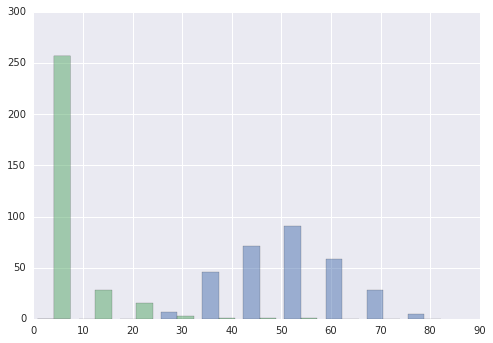

In [131]:
plt.hist([surgery.age, surgery.pos_nodes], alpha=.5)
plt.show()

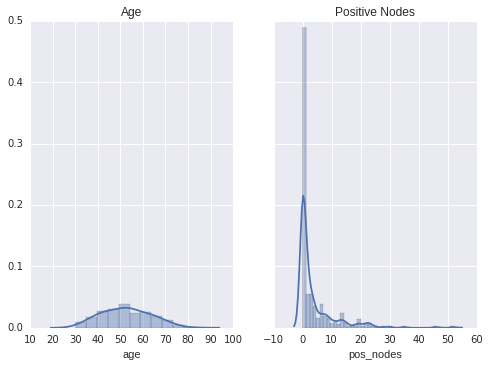

In [144]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
sns.distplot(surgery.age, ax=ax1)
ax1.set_title('Age')
sns.distplot(surgery.pos_nodes, ax=ax2)
ax2.set_title('Positive Nodes')
plt.show()

In [149]:
print ('Earliest Operation: {}'.format(min(surgery.yr_op) + 1900))

Earliest Operation: 1958


In [151]:
print ('Most Recent Operation: {}'.format(max(surgery.yr_op) + 1900))

Most Recent Operation: 1969


In [167]:
# y, X = dmatrices('status ~ age + pos_nodes', data=surgery, return_type='dataframe')
X = surgery.iloc[:,:3]
y = surgery.status.values

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=4444)

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
print ('Accuracy Score: {}'.format(accuracy_score(y_test, logreg.predict(x_test))))
logreg.coef_

Accuracy Score: 0.8152173913043478


array([[ 0.0155515 , -0.02899279,  0.07136197]])

Mainly positive nodes though year of op is negatively correlated and age is slightly positively correlated.

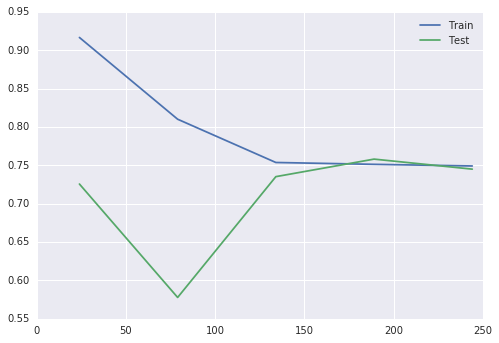

In [168]:
from sklearn.learning_curve import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    logreg, X, y, cv=5, n_jobs=1)

train_cv_scores = np.mean(train_scores, axis=1)
test_cv_scores = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_cv_scores, label='Train')
plt.plot(train_sizes, test_cv_scores, label='Test')
plt.legend()
plt.show()